<a href="https://colab.research.google.com/github/Murtaza-Husain1/Super-Saiyan-Classifier/blob/master/Super_Saiyan_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Murtaza-Husain1/Super-Saiyan-Classifier.git

Cloning into 'Super-Saiyan-Classifier'...
remote: Enumerating objects: 711, done.
remote: Counting objects: 100% (711/711), done.
remote: Compressing objects: 100% (699/699), done.
remote: Total 711 (delta 14), reused 699 (delta 7), pack-reused 0
Receiving objects: 100% (711/711), 256.66 MiB | 22.76 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Checking out files: 100% (685/685), done.


In [0]:
!git pull

In [0]:
# !git add *
# !git commit -m ""
# !git push

fatal: not a git repository (or any of the parent directories): .git


In [2]:
%cd /content/Super-Saiyan-Classifier
# cd ..

/content/Super-Saiyan-Classifier


In [29]:
!ls

ss3.csv


import * for ease of experimentation

In [0]:
from fastai.vision import *

# File Handling

Concatenate my text in all my .csv's (faster to do manually though)

In [0]:
import os
import glob
import pandas as pd

In [0]:
os.chdir(path)

In [0]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [0]:
folder = 'ss4'
f = 'ss4.csv'

In [0]:
path = Path('')
dest = path/folder

In [0]:
path = Path('')

In [8]:
path.ls()

[PosixPath('ss3.csv'),
 PosixPath('ss4.csv'),
 PosixPath('ss4'),
 PosixPath('ss2'),
 PosixPath('ss3'),
 PosixPath('.gitignore'),
 PosixPath('LICENSE'),
 PosixPath('Super_Saiyan_Classifier.ipynb'),
 PosixPath('ss1'),
 PosixPath('ss1-ss4'),
 PosixPath('.git'),
 PosixPath('ss1.csv'),
 PosixPath('uncombined'),
 PosixPath('ss2.csv')]

In [0]:
download_images(path/f, dest, max_pics=200)

In [0]:
!zip -r file.zip ss4

In [0]:
classes = ['ss1', 'ss2', 'ss3', 'ss4']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=800)

# View Data

In [0]:
np.random.seed(1440)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=.3,
                ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes

['ss1', 'ss2', 'ss3', 'ss4']

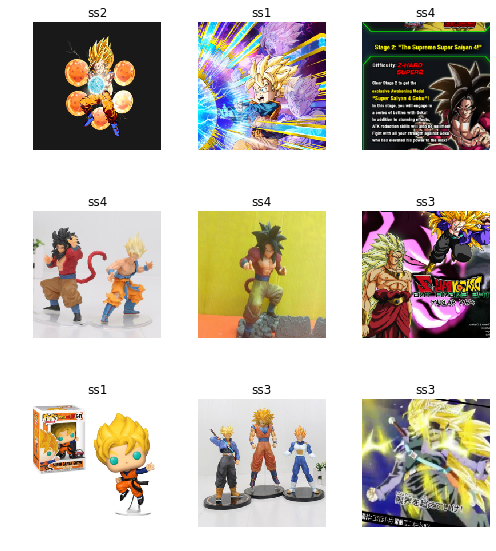

In [30]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ss1', 'ss2', 'ss3', 'ss4'], 4, 324, 323)

# Train Model

In [0]:
np.random.seed(1440)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=.3,
                ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [22]:
learn.fit_one_cycle(20) # valid_pct=.5, size=224, resnet50

epoch,train_loss,valid_loss,error_rate,time
0,2.089169,1.434048,0.566563,00:16
1,1.689437,0.986827,0.390093,00:16
2,1.340192,1.188131,0.349845,00:16
3,1.113081,1.295514,0.340557,00:16
4,0.939015,1.280002,0.309598,00:17
5,0.827047,1.267476,0.306502,00:17
6,0.733727,1.192820,0.294118,00:16
7,0.657825,1.193817,0.294118,00:16
8,0.600083,1.258076,0.312694,00:16
9,0.543890,1.228418,0.321981,00:16


In [28]:
learn.fit_one_cycle(5) # valid_pct=.5, size=276, resnet50

epoch,train_loss,valid_loss,error_rate,time
0,2.134518,1.342776,0.495356,00:24
1,1.524905,1.439352,0.377709,00:18
2,1.193137,1.222722,0.346749,00:18
3,0.957388,1.147786,0.343653,00:18
4,0.799861,1.116235,0.340557,00:18


In [32]:
learn.fit_one_cycle(5) # valid_pct=.3, size=224, resnet50

epoch,train_loss,valid_loss,error_rate,time
0,2.041633,1.426970,0.427835,00:18
1,1.460520,1.343378,0.340206,00:17
2,1.149111,1.419221,0.340206,00:17
3,0.955079,1.302137,0.324742,00:17
4,0.827899,1.216793,0.314433,00:17


In [40]:
learn.fit_one_cycle(1) # valid_pct=.3, size=224, resnet34

epoch,train_loss,valid_loss,error_rate,time
0,2.047154,1.905997,0.510309,00:16


In [0]:
learn.unfreeze()

In [42]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


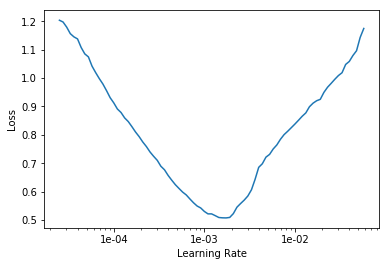

In [43]:
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.156109,2.325316,0.448454,00:16
1,0.992008,2.037805,0.432990,00:16


In [45]:
learn.fit_one_cycle(13)

epoch,train_loss,valid_loss,error_rate,time
0,0.618525,1.210938,0.298969,00:16
1,0.523687,0.866378,0.262887,00:16
2,0.432429,0.628309,0.206186,00:16
3,0.360281,0.739029,0.206186,00:16
4,0.310164,1.044665,0.221649,00:16
5,0.277756,1.033973,0.252577,00:16
6,0.261142,0.746302,0.195876,00:16
7,0.252832,0.784634,0.216495,00:16
8,0.219592,0.740154,0.195876,00:16
9,0.191917,0.674343,0.190722,00:16


In [0]:
learn.save('stage-1')

In [47]:
learn.fit_one_cycle(30)

epoch,train_loss,valid_loss,error_rate,time
0,0.029385,0.607637,0.185567,00:16
1,0.052287,0.582359,0.175258,00:16
2,0.040189,0.569828,0.164948,00:16
3,0.032968,0.600808,0.175258,00:16
4,0.040649,0.654404,0.170103,00:16
5,0.041332,0.792839,0.170103,00:16
6,0.049049,1.172529,0.242268,00:16
7,0.052501,0.944711,0.206186,00:17
8,0.067201,0.796311,0.195876,00:16
9,0.071040,1.458524,0.216495,00:16


# Analysis

In [0]:
learn.load('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

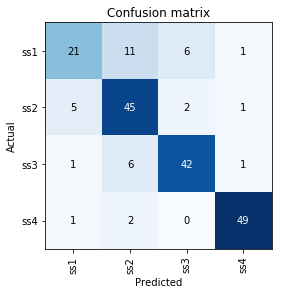

In [51]:
interp.plot_confusion_matrix()

The model is fairly accurate for ss2, ss3, and ss4, but ss1 is a bit all over the place. It's possible that the training data looks too similar to ss2. I might try to get more data for ss1. 80% is okay but we can do better.